**Imports**

In [11]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
# Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib
# setting random state for reproducibility
SEED = 321
np.random.seed(SEED)

**Data Dictionary**


1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
8. Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

- these grades are related with the course subject, Math or Portuguese:
31. G1 - first period grade (numeric: from 0 to 20)
31. G2 - second period grade (numeric: from 0 to 20)
32. G3 - final grade (numeric: from 0 to 20, output target)

In [2]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vS6xDKNpWkBBdhZSqepy48bXo55QnRv1Xy6tXTKYzZLMPjZozMfYhHQjAcC8uj9hQ/pub?output=xlsx"
df = pd.read_excel(url,sheet_name='student-por')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [3]:
pd.set_option('display.max_columns', 50)
df.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11


**Data Overview**

In [5]:
def summary_df(df_):
    df=df_.copy()
    report= pd.DataFrame({
                        'dtype': df.dtypes,
                        '# null': df.isna().sum(),
                        'null (%)': df.isna().sum()/len(df)*100,
                        'nunique': df.nunique(),
                        'min': df.min(),
                        'max': df.max(),   
                        })
    report.index.name= 'Column'
    return report.reset_index()
summary_df(df)

,Column,dtype,# null,null (%),nunique,min,max
0,school,object,0,0.0,2,GP,MS
1,sex,object,0,0.0,2,F,M
2,age,int64,0,0.0,8,15,22
3,address,object,0,0.0,2,R,U
4,famsize,object,0,0.0,2,GT3,LE3
5,Pstatus,object,0,0.0,2,A,T
6,Medu,int64,0,0.0,5,0,4
7,Fedu,int64,0,0.0,5,0,4
8,Mjob,object,0,0.0,5,at_home,teacher
9,Fjob,object,0,0.0,5,at_home,teacher


**Visualizing Grades**

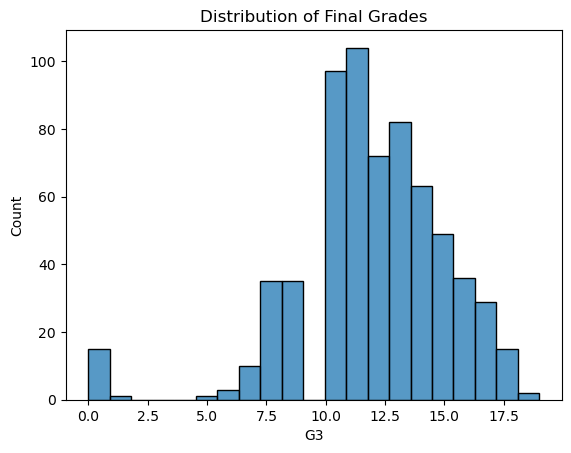

In [7]:
ax = sns.histplot(data=df,x='G3');
ax.set_title("Distribution of Final Grades");

In [10]:
# Checking version of sklearn
!python --version
print(f"sklearn version: {sklearn.__version__}")

Python 3.9.15
sklearn version: 1.1.3


**Feature Selecting**

- With G1 and G2 colums

**Train Test Split**

In [13]:
y= df['G3'].copy()
X= df.drop(columns= ['G3']).copy()

X_train, X_test, y_train, y_test= train_test_split(X,y, random_state= SEED)
X_train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
54,GP,F,15,U,LE3,A,3,3,other,other,other,mother,1,1,0,no,no,no,no,yes,yes,yes,no,5,3,4,4,4,1,0,13,12
208,GP,M,16,U,GT3,T,2,3,other,other,home,father,2,1,0,no,no,no,no,yes,yes,yes,no,5,3,3,1,1,3,0,13,12
23,GP,M,16,U,LE3,T,2,2,other,other,reputation,mother,2,2,0,no,yes,no,yes,yes,yes,yes,no,5,4,4,2,4,5,2,10,10
547,MS,M,16,R,LE3,T,4,1,other,at_home,other,father,1,1,0,no,no,no,no,yes,yes,yes,no,4,1,2,2,1,2,0,10,11
604,MS,F,18,U,GT3,T,1,1,at_home,services,course,mother,3,2,1,no,no,no,no,yes,no,no,no,4,4,2,1,2,2,2,9,10


**Preprocessing + Column Transformer**

In [14]:
# make categorical selector and verify it works 
cat_sel = make_column_selector(dtype_include='object')
cat_sel(X_train)

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [16]:
# make numeric selector and verify it works 
num_sel = make_column_selector(dtype_include='number')
num_sel(X_train)

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2']

In [17]:
# make pipelines for categorical vs numeric data
cat_pipe = make_pipeline(SimpleImputer(strategy='constant', fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))

In [18]:
preprocessor= make_column_transformer((num_pipe, num_sel),
                                     (cat_pipe, cat_sel),
                                     verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x15d3ffdc0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x15d3ff9a0>)],
                  verbose_feature_names_out=False)

In [19]:
# fit column transformer and run get_feature_names_out
preprocessor.fit(X_train)
feature_names= preprocessor.get_feature_names_out()
feature_names

array(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'school_GP', 'school_MS', 'sex_F', 'sex_M',
       'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3',
       'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_father', 'guardian_mother',
       'guardian_other', 'schoolsup_no', 'schoolsup_yes', 'famsup_no',
       'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no',
       'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes'], dtype=object)

In [20]:
# preprocessed dataframe
X_train_df= pd.DataFrame(preprocessor.transform(X_train),
                        columns= feature_names, index= X_train.index)
X_train_df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
54,15.0,3.0,3.0,1.0,1.0,0.0,5.0,3.0,4.0,4.0,4.0,1.0,0.0,13.0,12.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
208,16.0,2.0,3.0,2.0,1.0,0.0,5.0,3.0,3.0,1.0,1.0,3.0,0.0,13.0,12.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
23,16.0,2.0,2.0,2.0,2.0,0.0,5.0,4.0,4.0,2.0,4.0,5.0,2.0,10.0,10.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
547,16.0,4.0,1.0,1.0,1.0,0.0,4.0,1.0,2.0,2.0,1.0,2.0,0.0,10.0,11.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
604,18.0,1.0,1.0,3.0,2.0,1.0,4.0,4.0,2.0,1.0,2.0,2.0,2.0,9.0,10.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


In [23]:
# test df
X_test_df= pd.DataFrame(preprocessor.transform(X_test),
                       columns= feature_names, index= X_test.index)
X_test_df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
104,15.0,3.0,4.0,1.0,2.0,0.0,5.0,4.0,4.0,1.0,1.0,1.0,0.0,16.0,16.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
284,18.0,2.0,1.0,1.0,1.0,2.0,3.0,2.0,5.0,2.0,5.0,5.0,4.0,7.0,8.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
579,18.0,1.0,3.0,1.0,1.0,0.0,4.0,3.0,3.0,2.0,3.0,3.0,0.0,9.0,10.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
540,17.0,3.0,2.0,2.0,1.0,0.0,4.0,3.0,3.0,2.0,2.0,1.0,5.0,9.0,11.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
309,18.0,4.0,2.0,1.0,2.0,0.0,5.0,4.0,5.0,1.0,3.0,5.0,4.0,10.0,12.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


In [24]:
y_test.head()

104    16
284     6
579     9
540    11
309    14
Name: G3, dtype: int64

In [25]:
def evaluate_regression(model, X_train, y_train, X_test, y_test):
    """Evaluates a scikit learn regression model using r-squared and RMSE"""
    
    #Training Data
    y_pred_train= model.predict(X_train)
    r2_train= metrics.r2_score(y_train, y_pred_train)
    rmse_train= metrics.mean_squared_error(y_train, y_pred_train,
                                          squared=False)
    print(f"Training Data:\tR^2= {r2_train:.2f}\tRMSE= {rmse_train:.2f}")
    
    #Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    
    print(f"Test Data:\tR^2= {r2_test:.2f}\tRMSE= {rmse_test:.2f}")

In [26]:
reg = RandomForestRegressor(random_state=SEED)
reg.fit(X_train_df,y_train)
evaluate_regression(reg, X_train_df, y_train, X_test_df, y_test)

Training Data:	R^2= 0.98	RMSE= 0.52
Test Data:	R^2= 0.83	RMSE= 1.26


In [27]:
reg.feature_importances_

array([9.06096804e-03, 4.27750617e-03, 3.98699965e-03, 7.00472751e-03,
       2.25626018e-03, 3.51399028e-03, 2.49268280e-03, 7.28098375e-03,
       5.16832208e-03, 7.96493073e-03, 3.65255869e-03, 3.45093237e-03,
       2.12456262e-02, 1.43357641e-02, 8.49691456e-01, 1.50552537e-03,
       1.34049006e-03, 8.01336123e-04, 2.00642049e-03, 9.16339891e-04,
       1.07877854e-03, 7.07605663e-04, 9.56989326e-04, 5.25321529e-04,
       3.57271546e-04, 7.24549353e-04, 4.69078763e-04, 1.72276703e-03,
       7.87754005e-04, 4.04612977e-03, 4.95701770e-04, 6.32101752e-04,
       2.02437914e-03, 2.64153718e-03, 2.88623322e-04, 1.66038340e-03,
       1.49827250e-03, 7.13793226e-03, 1.32903677e-03, 2.40072554e-03,
       1.19251978e-03, 6.59015769e-04, 1.29186344e-03, 1.17453508e-03,
       2.87137667e-03, 2.08767090e-03, 4.90905227e-04, 2.05326973e-04,
       6.07999604e-04, 6.08562065e-04, 1.09193794e-03, 1.09819114e-03,
       3.43745866e-04, 3.14073124e-04, 3.66951986e-04, 5.29971880e-04,
      

In [28]:
# Checking the number of feature importances matches the # of columns
print(len(reg.feature_importances_))
print(len(X_train_df.columns))
len(reg.feature_importances_) == len(X_train_df.columns)

58
58


True

In [29]:
# Saving feature importances
importances = pd.Series(reg.feature_importances_, index= feature_names,
                       name='Feature Importance')
importances

age                  0.009061
Medu                 0.004278
Fedu                 0.003987
traveltime           0.007005
studytime            0.002256
failures             0.003514
famrel               0.002493
freetime             0.007281
goout                0.005168
Dalc                 0.007965
Walc                 0.003653
health               0.003451
absences             0.021246
G1                   0.014336
G2                   0.849691
school_GP            0.001506
school_MS            0.001340
sex_F                0.000801
sex_M                0.002006
address_R            0.000916
address_U            0.001079
famsize_GT3          0.000708
famsize_LE3          0.000957
Pstatus_A            0.000525
Pstatus_T            0.000357
Mjob_at_home         0.000725
Mjob_health          0.000469
Mjob_other           0.001723
Mjob_services        0.000788
Mjob_teacher         0.004046
Fjob_at_home         0.000496
Fjob_health          0.000632
Fjob_other           0.002024
Fjob_servi

In [30]:
importances.sum()

0.9999999999999999

In [31]:
# Saving the feature importances sorted from largest to smallest
sorted_importance= importances.sort_values(ascending=False)

sorted_importance

G2                   0.849691
absences             0.021246
G1                   0.014336
age                  0.009061
Dalc                 0.007965
freetime             0.007281
reason_other         0.007138
traveltime           0.007005
goout                0.005168
Medu                 0.004278
Mjob_teacher         0.004046
Fedu                 0.003987
Walc                 0.003653
failures             0.003514
health               0.003451
famsup_no            0.002871
Fjob_services        0.002642
famrel               0.002493
guardian_father      0.002401
studytime            0.002256
famsup_yes           0.002088
Fjob_other           0.002024
sex_M                0.002006
Mjob_other           0.001723
reason_course        0.001660
school_GP            0.001506
reason_home          0.001498
school_MS            0.001340
reason_reputation    0.001329
schoolsup_no         0.001292
guardian_mother      0.001193
schoolsup_yes        0.001175
nursery_yes          0.001098
nursery_no

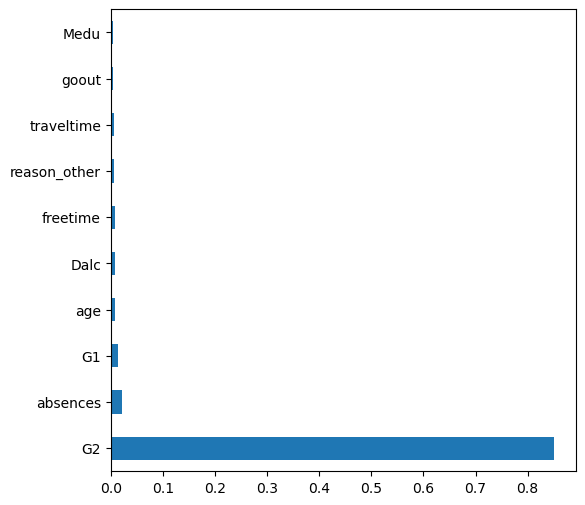

In [33]:
# just keep the top 10 importances and plot

sorted_importance.head(10).plot(kind= 'barh',
                               figsize=(6,6));

In [34]:
# Saving the feature importances sorted from smallest to largest
sorted_importance= importances.sort_values()
sorted_importance

paid_yes             0.000205
Fjob_teacher         0.000289
higher_yes           0.000314
higher_no            0.000344
Pstatus_T            0.000357
internet_no          0.000367
Mjob_health          0.000469
paid_no              0.000491
Fjob_at_home         0.000496
Pstatus_A            0.000525
internet_yes         0.000530
activities_no        0.000608
activities_yes       0.000609
Fjob_health          0.000632
guardian_other       0.000659
romantic_yes         0.000678
famsize_GT3          0.000708
Mjob_at_home         0.000725
Mjob_services        0.000788
sex_F                0.000801
address_R            0.000916
romantic_no          0.000948
famsize_LE3          0.000957
address_U            0.001079
nursery_no           0.001092
nursery_yes          0.001098
schoolsup_yes        0.001175
guardian_mother      0.001193
schoolsup_no         0.001292
reason_reputation    0.001329
school_MS            0.001340
reason_home          0.001498
school_GP            0.001506
reason_cou

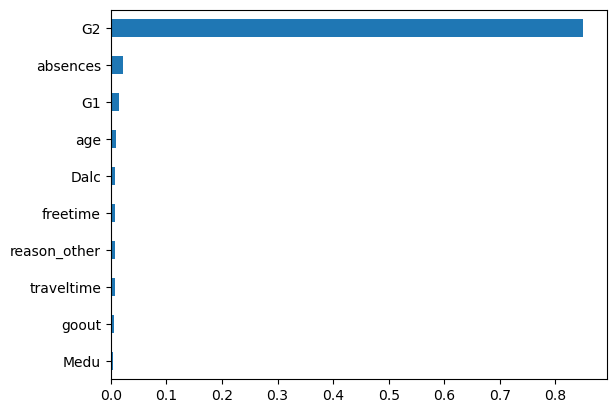

In [35]:
# just keep the top 10 importances and plot (that are now at the bottom of our series)

ax= sorted_importance.tail(10).plot(kind= 'barh');

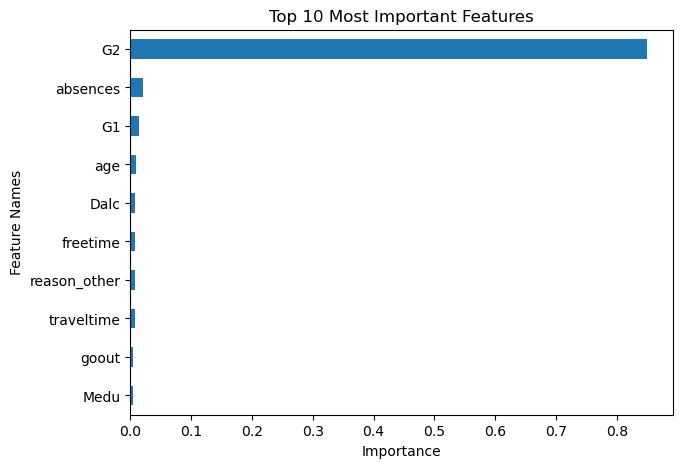

In [36]:
ax = sorted_importance.tail(10).plot(kind='barh',
                                    figsize=(7,5),
                                      )
ax.set(xlabel='Importance',
        ylabel='Feature Names',
        title='Top 10 Most Important Features');

- To save the Figure, we can either:
    - use the ax.get_figure() method to extract it from our axis
    - run a special matplotlib function in the same cell that we create the graph. The function is called plt.gcf() (get current figure)


We will demonstrate each method below:

get_figure()

In [37]:
fig_ax = ax.get_figure()

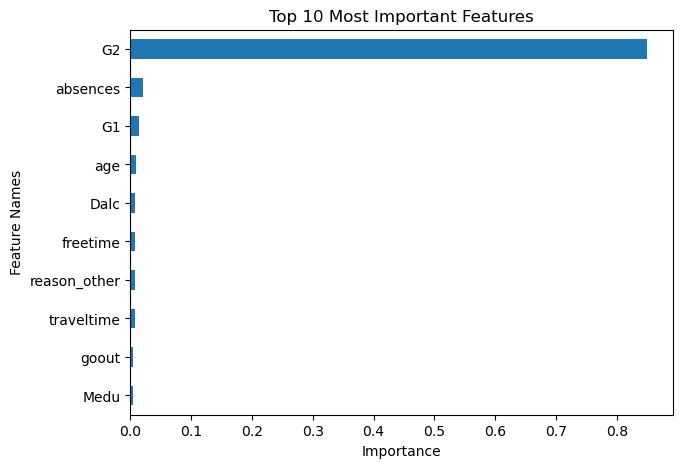

In [38]:
fig_ax

- plt.gcf()

    - plt.gcf() can be very helpful in scenarios where we cannot easily get the figure that is produced by a plotting function in a python package.

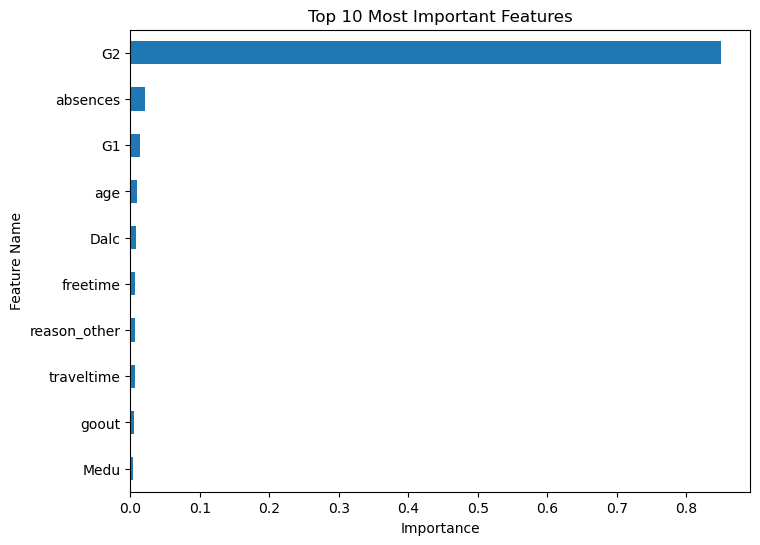

In [39]:
# Using plt.gcf to get the fig
ax = sorted_importance.tail(10).plot(kind='barh',
                                    figsize=(8,6), xlabel='Importance',
                                    ylabel='Feature Name', 
                                    title='Top 10 Most Important Features')
fig_gcf = plt.gcf()

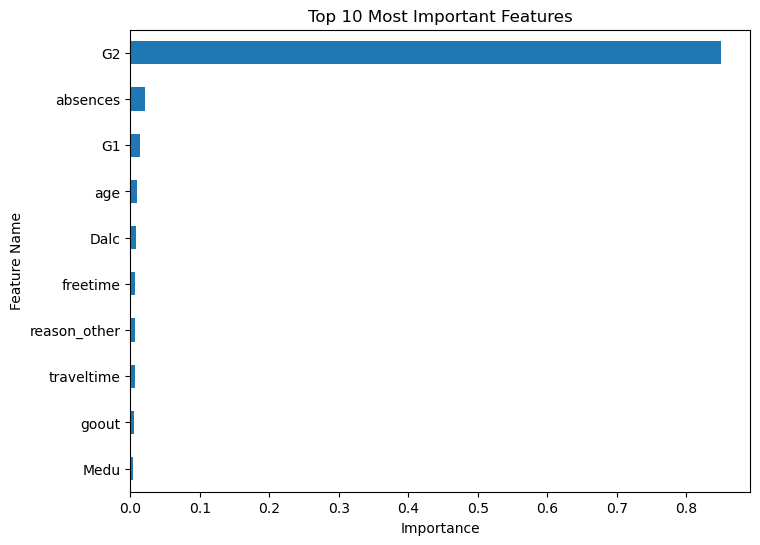

In [40]:
fig_gcf

In [41]:
def get_importances(model, feature_names=None,name='Feature Importance',
                   sort=False, ascending=True):
    
    ## checking for feature names
    if feature_names == None:
        feature_names = model.feature_names_in_
        
    ## Saving the feature importances
    importances = pd.Series(model.feature_importances_, index= feature_names,
                           name=name)
    
    # sort importances
    if sort == True:
        importances = importances.sort_values(ascending=ascending)
        
    return importances

In [42]:
importances = get_importances(reg,sort=True,ascending=False)
importances

G2                   0.849691
absences             0.021246
G1                   0.014336
age                  0.009061
Dalc                 0.007965
freetime             0.007281
reason_other         0.007138
traveltime           0.007005
goout                0.005168
Medu                 0.004278
Mjob_teacher         0.004046
Fedu                 0.003987
Walc                 0.003653
failures             0.003514
health               0.003451
famsup_no            0.002871
Fjob_services        0.002642
famrel               0.002493
guardian_father      0.002401
studytime            0.002256
famsup_yes           0.002088
Fjob_other           0.002024
sex_M                0.002006
Mjob_other           0.001723
reason_course        0.001660
school_GP            0.001506
reason_home          0.001498
school_MS            0.001340
reason_reputation    0.001329
schoolsup_no         0.001292
guardian_mother      0.001193
schoolsup_yes        0.001175
nursery_yes          0.001098
nursery_no

In [43]:
# custom function to plot our importances:
def plot_importance(importances, top_n=None,  figsize=(8,6)):
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Importance',
            ylabel='Feature Names',
            title=title)
    ## return ax in case want to continue to update/modify figure
    return ax

<AxesSubplot: title={'center': 'All Features - Ranked by Importance'}, xlabel='Importance', ylabel='Feature Names'>

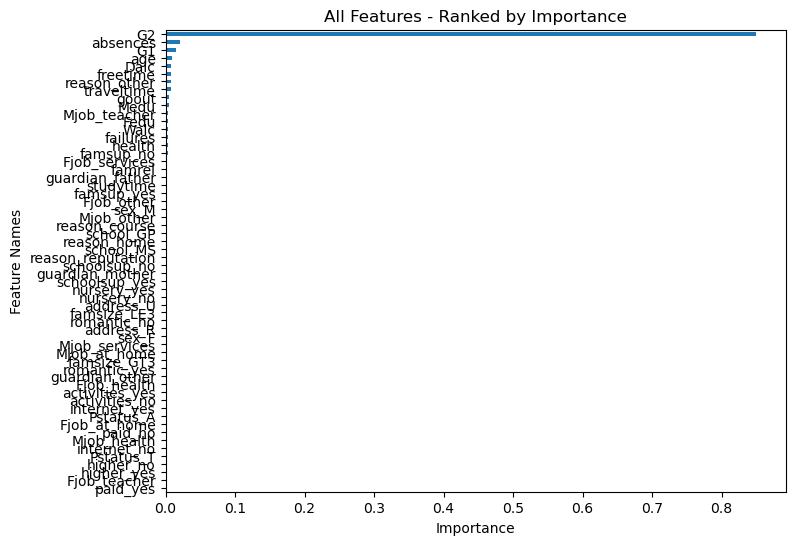

In [44]:
# testing our function
plot_importance(importances)

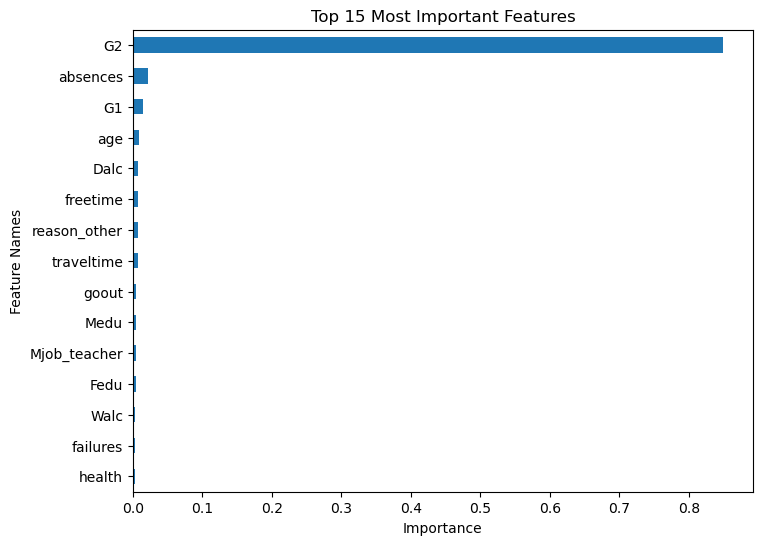

In [45]:
# testing our function
importances = get_importances(reg,sort=True,ascending=False,
                              name="RandomForest Importances")
plot_importance(importances,top_n=15);

Training Data:	R^2= 0.98	RMSE= 0.52
Test Data:	R^2= 0.83	RMSE= 1.26


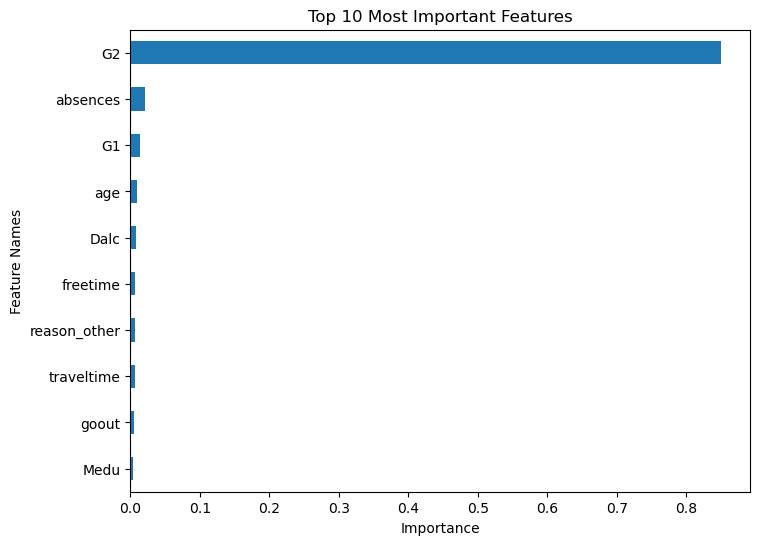

In [46]:
#  fit random forest
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train_df,y_train)
evaluate_regression(reg, X_train_df, y_train, X_test_df,y_test)
# Saving the feature importances
importances = get_importances(reg)
plot_importance(importances, top_n=10);